In [1]:
#Univariate selection
import pandas as pd 
import numpy as np 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [2]:
 data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/featureSelection /test.csv")
 data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [3]:
x=data.iloc[:,0:20]
y=data.iloc[:,-1]


In [4]:
#applying selectKBest top 10 features 
best_features=SelectKBest(score_func=chi2,k=10)
fit =best_features.fit(x,y)
fit.scores_


array([2.23566155e+02, 2.57085892e-02, 3.16391811e-01, 1.05276154e+00,
       4.80637037e-01, 1.57931166e+01, 6.52039759e-01, 1.37225209e+00,
       2.40068358e-01, 4.23286266e+01, 6.36202478e-02, 1.11481548e+01,
       4.63471620e+01, 8.52914979e+02, 5.62837207e+02, 1.39406148e-02,
       8.09077273e-01, 7.60552866e-01, 1.48205048e-01, 3.38066261e-01])

In [5]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
dfcolumns

,0
0,id
1,battery_power
2,blue
3,clock_speed
4,dual_sim
5,fc
6,four_g
7,int_memory
8,m_dep
9,mobile_wt


In [6]:
#concatinate the dataframe 
featuresScore=pd.concat([dfcolumns,dfscores],axis= 1)
featuresScore.columns=['feactures','score']
featuresScore

,feactures,score
0,id,223.566155
1,battery_power,0.025709
2,blue,0.316392
3,clock_speed,1.052762
4,dual_sim,0.480637
5,fc,15.793117
6,four_g,0.652040
7,int_memory,1.372252
8,m_dep,0.240068
9,mobile_wt,42.328627


In [7]:
featuresScore.sort_values(by='score',ascending=False)

,feactures,score
13,px_width,852.914979
14,ram,562.837207
0,id,223.566155
12,px_height,46.347162
9,mobile_wt,42.328627
5,fc,15.793117
11,pc,11.148155
7,int_memory,1.372252
3,clock_speed,1.052762
16,sc_w,0.809077


In [10]:
# Feature Impotance 
#Taking features with tree based algorithm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [11]:
model=RandomForestClassifier()
model.fit(x,y)



RandomForestClassifier()

In [21]:
feature_importance_=model.feature_importances_
feature_importance_

array([0.08233748, 0.07950485, 0.01075163, 0.05237737, 0.01264046,
       0.04702641, 0.01143286, 0.06282117, 0.04598438, 0.0832457 ,
       0.04064445, 0.05552563, 0.07692377, 0.08262702, 0.08104805,
       0.04995482, 0.05056764, 0.05448637, 0.00823463, 0.01186529])

In [28]:
fI=pd.DataFrame(feature_importance_,index=x.columns,columns=['importance'])
fI.sort_values(by='importance',ascending=False)

,importance
mobile_wt,0.083246
px_width,0.082627
id,0.082337
ram,0.081048
battery_power,0.079505
px_height,0.076924
int_memory,0.062821
pc,0.055526
talk_time,0.054486
clock_speed,0.052377


<BarContainer object of 20 artists>

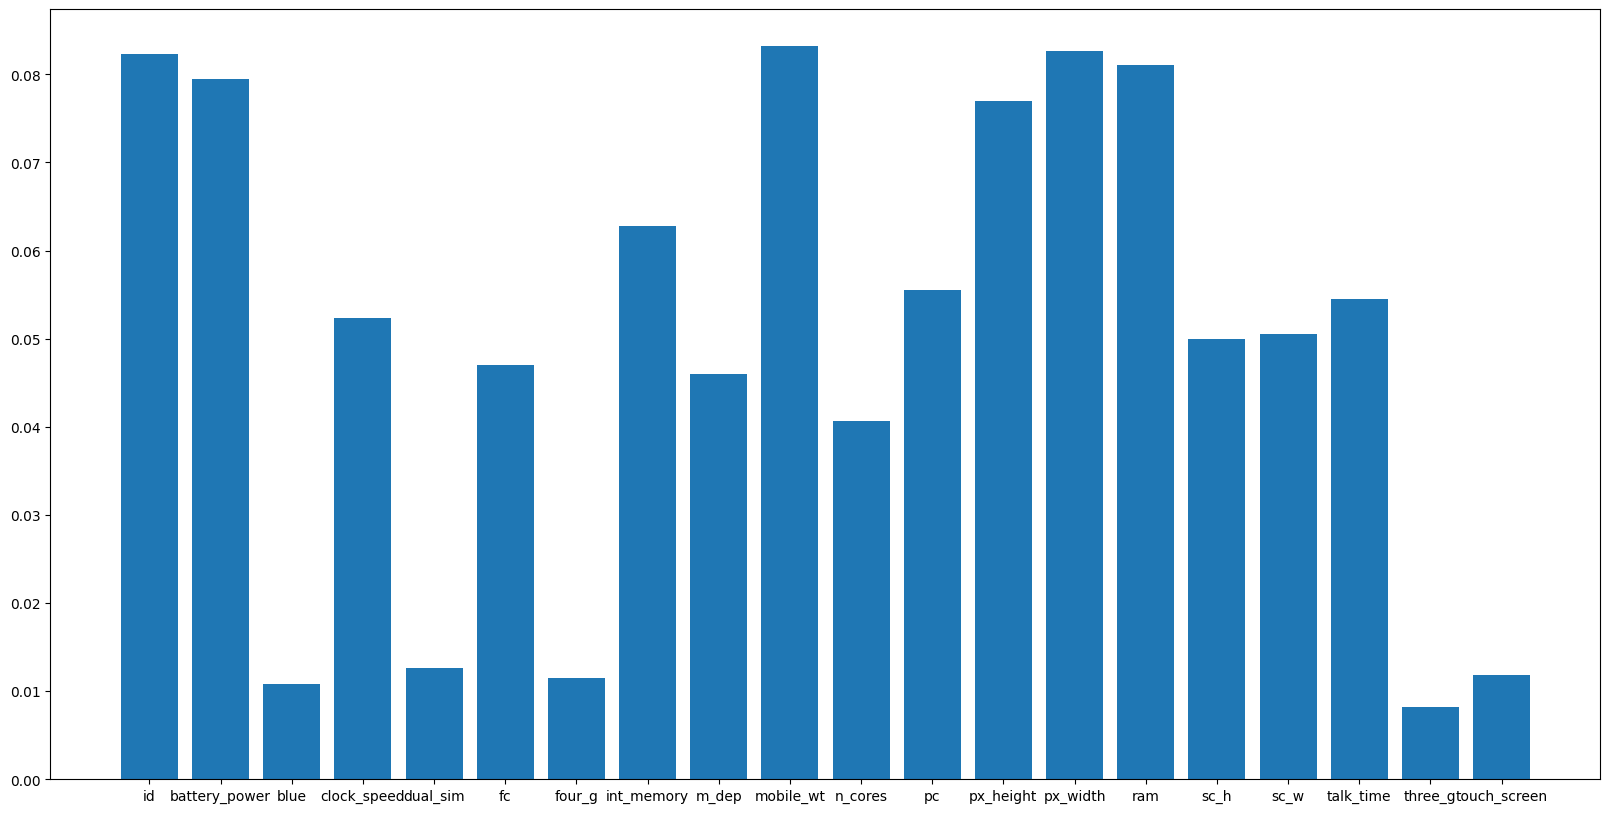

In [32]:
plt.figure(figsize=(20,10))
plt.bar(fI.index,fI['importance'])

In [37]:
#using Correlation matrix
import seaborn as sns 
data_corr=data.corr()
data_corr


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,1.000000,-0.021511,0.000464,0.035917,-0.002721,0.016934,0.030921,-0.014023,-0.002794,-0.007541,...,0.001969,-0.025056,-0.012138,-0.043442,-0.011972,0.002918,0.030807,4.957099e-02,3.976791e-02,-0.036643
battery_power,-0.021511,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,...,0.012847,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546,3.151417e-02,-1.013784e-02,-0.000414
blue,0.000464,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,...,-0.025247,-0.058810,-0.032054,0.057570,0.012780,0.004223,-0.031995,1.352986e-02,-6.003074e-02,0.025568
clock_speed,0.035917,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,...,0.047469,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797,-2.140644e-02,6.189276e-02,-0.048593
dual_sim,-0.002721,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,...,0.073936,0.006842,0.015610,0.048171,0.006295,-0.002064,0.004390,6.895838e-04,3.401967e-02,0.031545
fc,0.016934,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,...,0.659338,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458,-1.112104e-02,1.546706e-02,-0.060373
four_g,0.030921,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,...,0.037669,0.033655,0.036545,0.030821,-0.015087,-0.000893,0.013692,5.535283e-01,-1.000338e-02,-0.035652
int_memory,-0.014023,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,...,0.022682,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759,-1.592239e-02,2.218589e-02,0.011860
m_dep,-0.002794,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,...,0.012663,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124,-2.927827e-02,4.025363e-02,-0.039705
mobile_wt,-0.007541,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,...,0.027343,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704,6.261881e-03,4.452531e-02,0.069762


<Axes: >

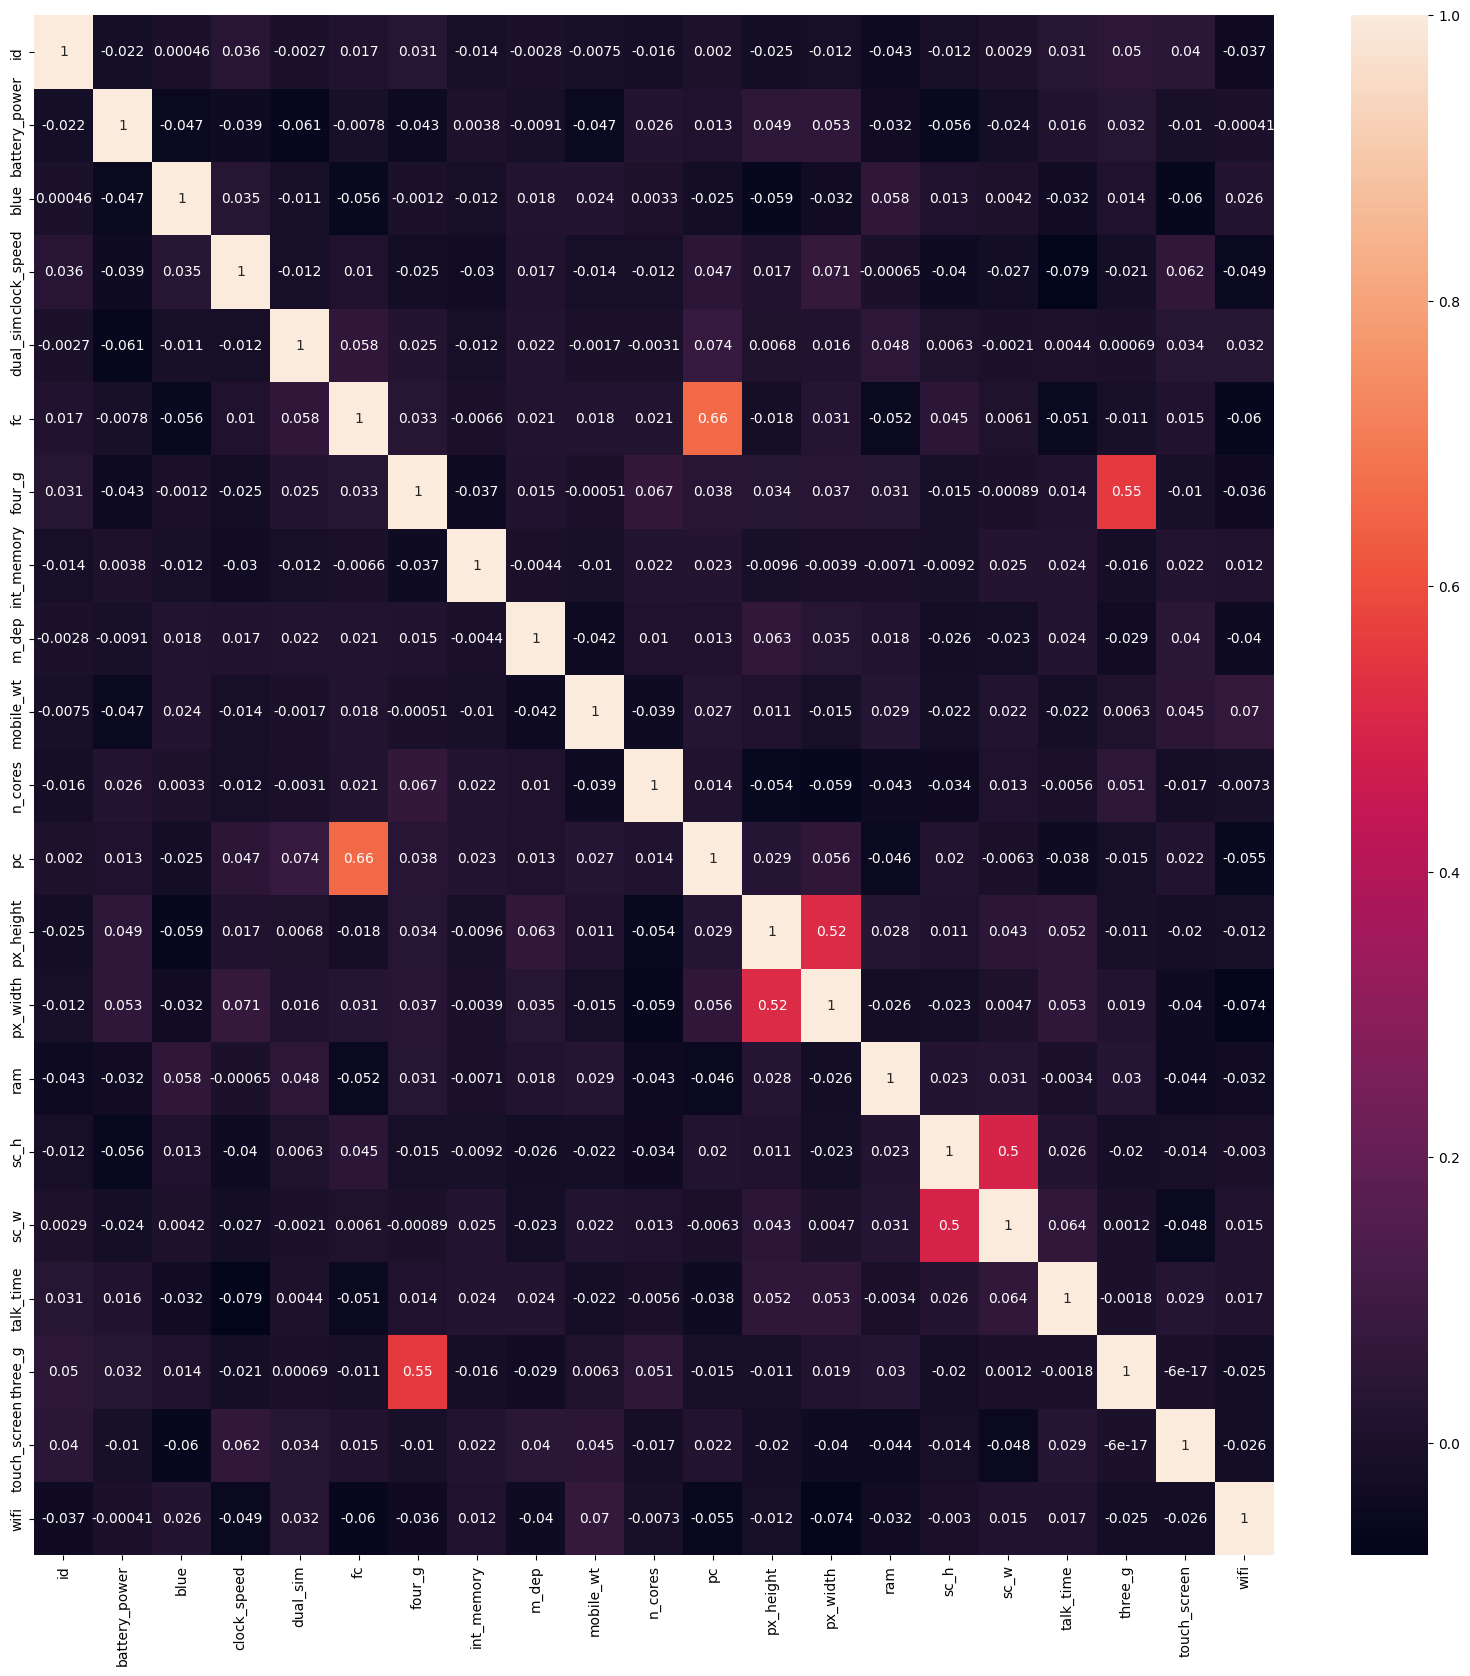

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True)


In [ ]:
#which are highly correlated with each other we can select those features 

In [41]:
#check the model performance 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [49]:
rfc=RandomForestClassifier()
score=cross_val_score(rfc,x,y,cv=10)
print(score)

[0.49 0.48 0.55 0.46 0.41 0.52 0.5  0.45 0.55 0.46]


In [48]:
score.mean()

0.491

In [54]:
top10=featuresScore.sort_values(by='score',ascending=False).head(10)['feactures'].values

In [56]:
top10

array(['px_width', 'ram', 'id', 'px_height', 'mobile_wt', 'fc', 'pc',
       'int_memory', 'clock_speed', 'sc_w'], dtype=object)

In [60]:
new_score=cross_val_score(rfc,x[top10],y,cv=10)
new_score.mean()

0.497